<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

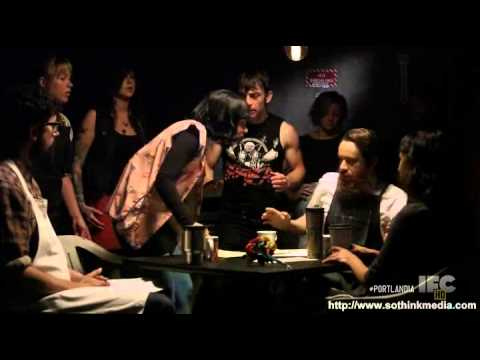

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'C:\\Users\\malmt\\OneDrive\\Desktop\\Lambda\\Unit_4\\Sprint_1\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [100]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")






In [101]:
df = pd.read_csv('data\yelp_coffeeshop_review_data.csv')


In [102]:
!dir


 Volume in drive C has no label.
 Volume Serial Number is 5ACD-12FE

 Directory of C:\Users\malmt\OneDrive\Desktop\Lambda\Unit_4\Sprint_1\DS-Unit-4-Sprint-1-NLP\module1-text-data

09/01/2020  11:57 AM    <DIR>          .
09/01/2020  11:57 AM    <DIR>          ..
09/01/2020  06:12 AM    <DIR>          .ipynb_checkpoints
08/31/2020  06:04 PM    <DIR>          data
08/30/2020  05:11 PM    <DIR>          images
09/01/2020  06:12 AM           228,462 LS_DS_411_Text Data_Lecture.ipynb
09/01/2020  11:57 AM           214,597 LS_DS_411_Text_Data_Assignment.ipynb
08/30/2020  05:11 PM    <DIR>          previous_lectures
               2 File(s)        443,059 bytes
               6 Dir(s)  168,774,922,240 bytes free


In [103]:
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [104]:
df.shape

(7616, 3)

In [105]:
df['full_review_text'].value_counts(normalize=True)[:2]

 11/23/2016 1 check-in My best friend and I came to The Factory after seeing it on a couple of best new Austin brunch lists. It's super cute and trendy, to the point where it feels kind of out of place in a strip mall. Although I loved the interior design and general ambiance of the place, I was a little disappointed with the menu. This is more of a coffee shop than a cafe - their food options are pretty limited. My friend ordered the chicken and waffles and I ordered Nutella waffles with strawberries and bananas. For the price I paid, the portions were definitely on the smaller side. I enjoyed my meal still, but it's hard to mess up Nutella and fruit, so I wasn't particularly impressed. I would love to come back to study sometime but since they don't have wifi, I don't think it'll be likely.     0.000525
 10/6/2016 First to Review The Factory is AWESOME! What a great spot! I had the chicken and waffles (new take, but I now have cravings for them!), the homemade Poptart was so fun and 

In [169]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    tokens = [x.strip(' ') for x in tokens]
    
    return tokens

df['tokens'] = df['full_review_text'].apply(tokenize)
df['tokens']

0       [11252016, 1, checkin, love, love, loved, the,...
1       [1222016, listed, in, date, night, austin, amb...
2       [11302016, 1, checkin, listed, in, brunch, spo...
3       [11252016, very, cool, decor, good, drinks, ni...
4       [1232016, 1, checkin, they, are, located, with...
                              ...                        
7611    [2192015, i, actually, step, into, this, resta...
7612    [1212016, ok, the, steeping, room, is, awesome...
7613    [4302015, loved, coming, here, for, tea, and, ...
7614    [822015, the, food, is, just, average, the, bo...
7615    [5232015, i, finally, stopped, in, for, lunch,...
Name: tokens, Length: 7616, dtype: object

In [108]:
df['tokens'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

In [109]:
df[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[11202016, 1, checkin, very, cute, cafe, i, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[10272016, 2, checkins, listed, in, nuptial, c..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[1122016, 2, checkins, love, this, place, 5, s..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[10252016, 1, checkin, ok, lets, try, this, ap..."
9,11/10/2016 3 check-ins This place has been sh...,"[11102016, 3, checkins, this, place, has, been..."


How do we want to analyze these coffee shop tokens?

Overall Word / Token Count
View Counts by Rating
Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.

In [170]:
# Object from Base Python
# Counter is dictionary object that counts items in a list
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

A function which takes a corpus of document and returns and dataframe of word counts for further analysis

In [171]:
df['tokens'].count

<bound method Series.count of 0       [11252016, 1, checkin, love, love, loved, the,...
1       [1222016, listed, in, date, night, austin, amb...
2       [11302016, 1, checkin, listed, in, brunch, spo...
3       [11252016, very, cool, decor, good, drinks, ni...
4       [1232016, 1, checkin, they, are, located, with...
                              ...                        
7611    [2192015, i, actually, step, into, this, resta...
7612    [1212016, ok, the, steeping, room, is, awesome...
7613    [4302015, loved, coming, here, for, tea, and, ...
7614    [822015, the, food, is, just, average, the, bo...
7615    [5232015, i, finally, stopped, in, for, lunch,...
Name: tokens, Length: 7616, dtype: object>

In [112]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [113]:
# Use the Function
wc = count(df['tokens'])

In [114]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
59,the,6847,34809,1.0,0.044537,0.044537,0.899028
22,and,6864,26650,2.0,0.034098,0.078635,0.901261
12,a,6246,22755,3.0,0.029114,0.107749,0.820116
53,i,5528,20237,4.0,0.025893,0.133642,0.725840
6,to,5653,17164,5.0,0.021961,0.155602,0.742253


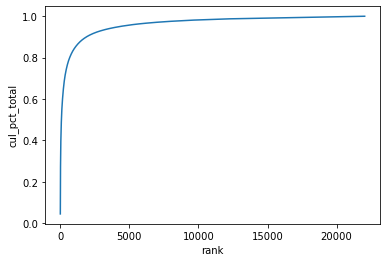

In [115]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [19]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5335194530026511

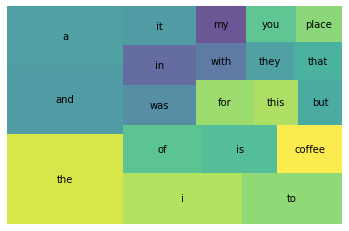

In [172]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [173]:
df['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [174]:
df['star_rating'][5]

' 4.0 star rating '

In [175]:
df['determination'] = ["good" if star_rating == ' 5.0 star rating ' else "good" if star_rating == ' 4.0 star rating ' else "bad" for star_rating in df['star_rating']]
df['determination'].value_counts(normalize=True)

good    0.806197
bad     0.193803
Name: determination, dtype: float64

In [176]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas,determination
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,...","[11/25/2016, check, Love, love, love, atmosphe...",good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb...","[12/2/2016, list, Date, Night, Austin, Ambianc...",good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo...","[11/30/2016, check, list, Brunch, Spots, love,...",good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni...","[11/25/2016, cool, decor, good, drink, nice, s...",bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with...","[12/3/2016, check, locate, Northcross, mall, s...",good


In [177]:
df_good = df[df.determination.str.contains('good', case=False)]
df_bad = df[df.determination.str.contains('bad', case=False)]

In [178]:
# 20 words for df with good rating
word_counts = Counter()
df_good['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(30)

[('the', 26616),
 ('and', 21311),
 ('a', 17706),
 ('i', 14952),
 ('to', 12763),
 ('of', 9932),
 ('is', 9644),
 ('coffee', 8234),
 ('in', 7517),
 ('it', 6898),
 ('was', 6774),
 ('for', 6608),
 ('this', 5122),
 ('with', 5040),
 ('they', 4871),
 ('you', 4728),
 ('my', 4677),
 ('but', 4604),
 ('that', 4462),
 ('place', 4314),
 ('on', 4102),
 ('have', 3969),
 ('so', 3506),
 ('are', 3506),
 ('great', 3453),
 ('good', 3096),
 ('its', 2907),
 ('their', 2885),
 ('not', 2791),
 ('here', 2634)]

In [179]:
# 20 words for df with bad rating
word_counts = Counter()
df_bad['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(30)

[('the', 8193),
 ('and', 5339),
 ('i', 5285),
 ('a', 5049),
 ('to', 4401),
 ('was', 2933),
 ('of', 2668),
 ('it', 2481),
 ('is', 2355),
 ('coffee', 2119),
 ('for', 2072),
 ('in', 2029),
 ('but', 1897),
 ('that', 1689),
 ('my', 1525),
 ('this', 1461),
 ('not', 1416),
 ('they', 1294),
 ('with', 1292),
 ('on', 1149),
 ('you', 1119),
 ('place', 1112),
 ('so', 1051),
 ('have', 1050),
 ('be', 913),
 ('good', 877),
 ('like', 876),
 ('are', 853),
 ('had', 836),
 ('just', 822)]

Can visualize the words with the greatest difference in counts between 'good' & 'bad'?
Couple Notes:

Rel. freq. instead of absolute counts b/c of different numbers of reviews
Only look at the top 5-10 words with the greatest differences

In [180]:
# new dataframes with determination 
df_good_bad = pd.concat([df_good,df_bad])
df_good_bad['determination'].value_counts(normalize=True)

good    0.806197
bad     0.193803
Name: determination, dtype: float64

In [181]:
#top 5-10 words with the greatest differences - get rid of stop words
import spacy

nlpl = spacy.load("en_core_web_lg")

In [182]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [184]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens
df.tokens.head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

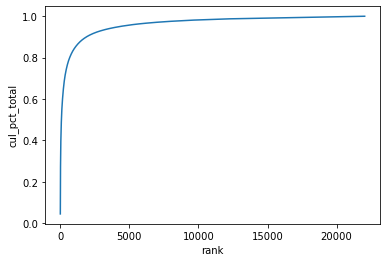

In [185]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [186]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5335194530026511

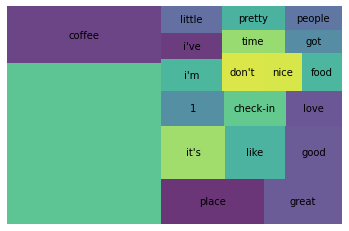

In [188]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [199]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','1', 'coffee','place', 'i', 'it', "it's", 'it.',"i've","1","i'm","-","it.", 'the', 'this',])

In [200]:
tokens = []

for doc in tokenizer.pipe(df_good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):  
            doc_tokens.append(token.text.lower())
        
   
    tokens.append(doc_tokens)
    
df_good['tokens'] = tokens

C:\Users\malmt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
tokens = []

for doc in tokenizer.pipe(df_bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):  
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df_bad['tokens'] = tokens

C:\Users\malmt\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [202]:
wc = count(df_bad['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,like,548,834,1.0,0.009957,0.009957,0.371274
6,good,441,599,2.0,0.007152,0.017109,0.298780
190,don't,340,430,3.0,0.005134,0.022243,0.230352
139,food,266,369,4.0,0.004406,0.026648,0.180217
59,check-in,359,359,5.0,0.004286,0.030934,0.243225
241,time,264,351,6.0,0.004191,0.035125,0.178862
81,pretty,278,349,7.0,0.004167,0.039292,0.188347
60,great,264,348,8.0,0.004155,0.043447,0.178862
519,people,247,327,9.0,0.003904,0.047351,0.167344
33,service,261,314,10.0,0.003749,0.051100,0.176829


In [203]:
wc = count(df_good['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
79,great,2174,2902,1.0,0.009876,0.009876,0.354072
265,good,1643,2180,2.0,0.007419,0.017294,0.267590
235,like,1486,2068,3.0,0.007038,0.024332,0.242020
2,love,1263,1604,4.0,0.005459,0.029791,0.205700
28,check-in,1598,1602,5.0,0.005452,0.035242,0.260261
606,little,1027,1230,6.0,0.004186,0.039428,0.167264
253,nice,962,1101,7.0,0.003747,0.043175,0.156678
455,best,951,1093,8.0,0.003720,0.046894,0.154886
171,friendly,986,1014,9.0,0.003451,0.050345,0.160586
60,austin,875,1013,10.0,0.003447,0.053792,0.142508


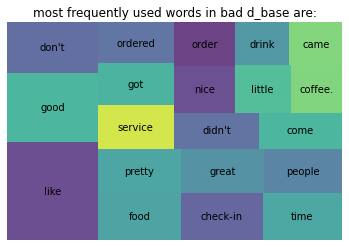

In [204]:
wc = count(df_bad['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.title('most frequently used words in bad d_base are:')
plt.axis('off')
plt.show()

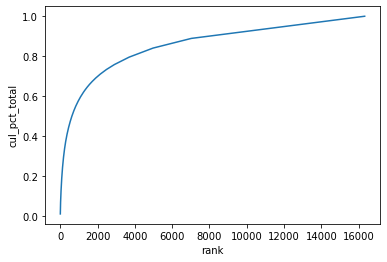

In [205]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

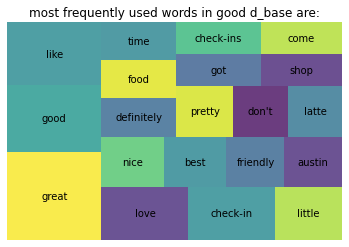

In [206]:
wc = count(df_good['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.title('most frequently used words in good d_base are:')
plt.axis('off')
plt.show()

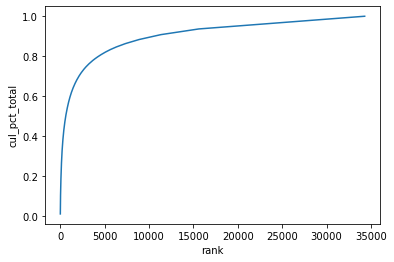

In [207]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

